In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle. json ~/ kaggle/

cp: target 'kaggle/' is not a directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:11<00:00, 96.0MB/s]
100% 1.06G/1.06G [00:12<00:00, 94.9MB/s]


In [ ]:
import zipfile
zp = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zp.extractall('/content')
zp.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_new = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


test_new = ImageDataGenerator(rescale=1./255)

train_new_data = train_new.flow_from_directory(
    '/content/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary'
)

test_new_data = test_new.flow_from_directory(
    '/content/test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras. layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization , Dropout

In [ ]:
import numpy as np

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_new_data,
    epochs =10,
    validation_data = test_new_data,
    callbacks = [early_stopping]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 222ms/step - accuracy: 0.5922 - loss: 0.6587 - val_accuracy: 0.7592 - val_loss: 0.4977
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 216ms/step - accuracy: 0.7371 - loss: 0.5230 - val_accuracy: 0.7848 - val_loss: 0.4588
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 212ms/step - accuracy: 0.7941 - loss: 0.4411 - val_accuracy: 0.8154 - val_loss: 0.4082
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 215ms/step - accuracy: 0.8102 - loss: 0.4058 - val_accuracy: 0.8348 - val_loss: 0.3674
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 252ms/step - accuracy: 0.8312 - loss: 0.3762 - val_accuracy: 0.8226 - val_loss: 0.3966
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 273ms/step - accuracy: 0.8434 - loss: 0.3514 - val_accuracy: 0.8468 - val_loss: 0.3470
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 182s 240ms/step - accuracy: 0.8610 - loss: 0.3256 - val_accuracy: 0.8430 - val_loss: 0.3553
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 259ms/step - accuracy: 0.8725 - loss: 0.29

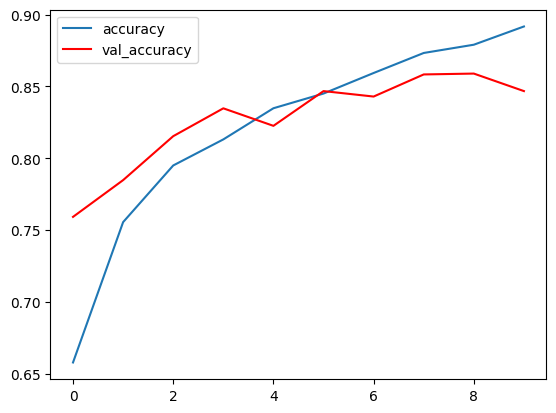

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],color='red',label='val_accuracy')
plt.legend()
plt.show()

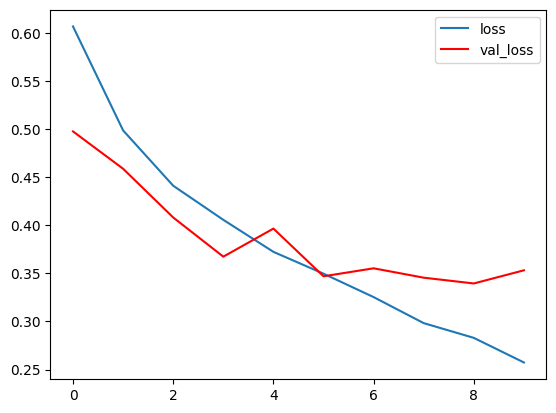

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],color='red',label='val_loss')
plt.legend()
plt.show()

**0 as Cat , 1 as Dog**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


array([[0.]], dtype=float32)

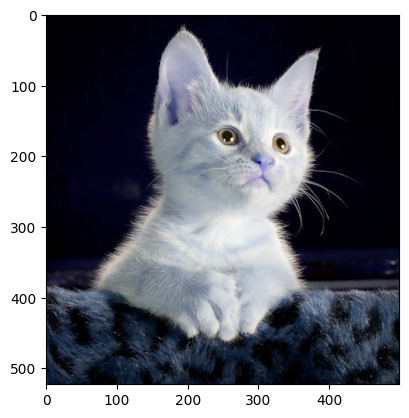

In [ ]:
import cv2
img1 = cv2.imread('/content/kitty-cat-kitten-pet-45201.jpeg')
plt.imshow(img1)
img1.shape
img1 = cv2.resize(img1,(150,150))
test_img= img1.reshape((1,150,150,3))
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[1.]], dtype=float32)

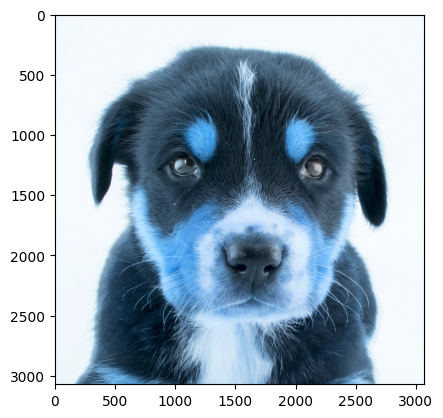

In [ ]:
img2 = cv2.imread('/content/dog.jpg')
plt.imshow(img2)
img2.shape
img2 = cv2.resize(img2,(150,150))
test_img1= img2.reshape((1,150,150,3))
model.predict(test_img1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)

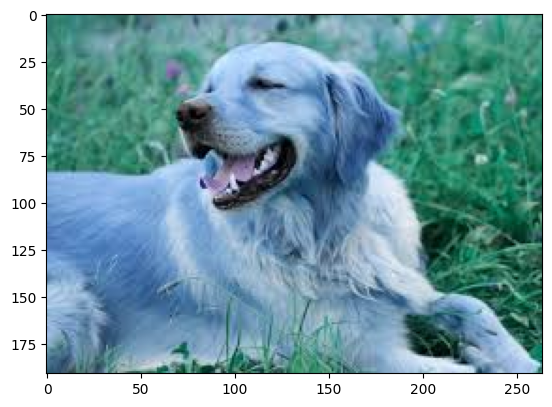

In [ ]:
img3 = cv2.imread('/content/dog_golden.jpeg')
plt.imshow(img3)
img3.shape
img3 = cv2.resize(img3,(150,150))
test_img2= img3.reshape((1,150,150,3))
model.predict(test_img2)